Before we set up in any type of DB and make API calls.. we should decide on which model to use and see if we should use filtering and dropdown... because it'll be easier to ask the a model that can do simple requests such as "look for when alain delon was 25 and under and making movies like this" than to ask a user to prompt it and open the can of worms which is large language models (but maybe we can use llama-2 HHAHAHA)

In [29]:
# imports
import pandas as pd
import json
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans




In [11]:
df_creds = pd.read_csv('./tmdb_5000_credits.csv')
df_creds.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [20]:
df_films = pd.read_csv('./tmdb_5000_movies.csv')
# gonna drop a lot of useless columns
df_films.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [21]:
df_films = df_films.drop([
    'budget', 
    'homepage', 
    'original_language', 
    'overview', 
    'popularity', 
    'production_companies',
    'production_countries',
    'release_date',
    'revenue',
    'runtime',
    'spoken_languages',
    'status',
    'tagline',
    'title',
    'vote_average',
    'vote_count',
    'id'
], axis=1)
df_films.head(5)

,genres,keywords,original_title
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",Spectre
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",The Dark Knight Rises
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",John Carter


ok lets dooo some knn


In [22]:
import ast

df_films['Extracted_Genres'] = df_films['genres'].apply(lambda x: [d['name'] for d in ast.literal_eval(x)])
df_films['Extracted_Genres']

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4798                        [Action, Crime, Thriller]
4799                                [Comedy, Romance]
4800               [Comedy, Drama, Romance, TV Movie]
4801                                               []
4802                                    [Documentary]
Name: Extracted_Genres, Length: 4803, dtype: object

one hot encode this bitch!!!

In [30]:
mlb = MultiLabelBinarizer()
df_genres_onehot = pd.DataFrame(mlb.fit_transform(df_films['Extracted_Genres']), columns=mlb.classes_, index=df_films.index)
df_films_onehot = pd.concat([df_films, df_genres_onehot], axis=1)
df_films_onehot = df_films_onehot.drop(['genres', 'keywords', 'Extracted_Genres'], axis = 1)
df_films_onehot


,original_title,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,Avatar,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Spectre,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Dark Knight Rises,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,John Carter,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,El Mariachi,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4799,Newlyweds,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4800,"Signed, Sealed, Delivered",0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
4801,Shanghai Calling,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df = df_films_onehot

# Prepare features for clustering (exclude the 'original_title' column)
X = df.drop(['original_title'], axis=1)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=19)  # Choose an appropriate number of clusters
df['cluster'] = kmeans.fit_predict(X)

# Now, each movie has a cluster label in the 'cluster' column
print(df[['original_title', 'cluster']])

# To recommend 'Action' movies from a specific cluster:
action_cluster = df[df['Action'] == 1]['cluster'].mode()[0]  # Find the most common cluster among 'Action' movies
recommendations = df[(df['cluster'] == action_cluster) & (df['Action'] == 1)]['original_title']
print("Recommended movies for 'Action':", recommendations.tolist())

c:\Users\jason\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                original_title  cluster
0                                       Avatar        9
1     Pirates of the Caribbean: At World's End        9
2                                      Spectre        9
3                        The Dark Knight Rises        4
4                                  John Carter        9
...                                        ...      ...
4798                               El Mariachi       12
4799                                 Newlyweds        3
4800                 Signed, Sealed, Delivered       13
4801                          Shanghai Calling       17
4802                         My Date with Drew       17

[4803 rows x 2 columns]
Recommended movies for 'Action': ['Battleship', 'Jurassic World', 'Skyfall', 'X-Men: The Last Stand', 'Green Lantern', 'G.I. Joe: The Rise of Cobra', 'Inception', 'Poseidon', 'Terminator Genisys', 'X-Men Origins: Wolverine', 'The Matrix Revolutions', 'The Matrix Reloaded', 'Mad Max: Fury Road', 'Missio

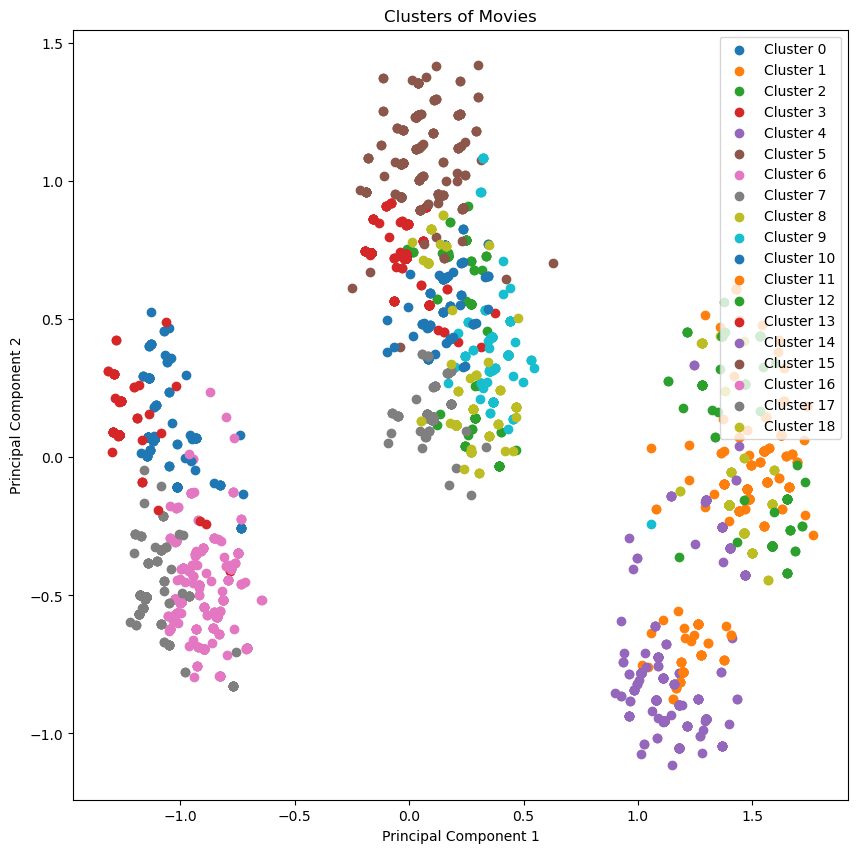

In [33]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(X)

# Scatter plot for each cluster
plt.figure(figsize=(10, 10))

for cluster_num in range(19):  # assuming you used 19 clusters
    members = reduced_features[df['cluster'] == cluster_num]
    plt.scatter(members[:, 0], members[:, 1], label=f'Cluster {cluster_num}')

plt.title('Clusters of Movies')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
